### Data Reading

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("winequality-red.csv",sep=";")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Features

In [5]:
feature_list=df.columns[:-1].values
label=[df.columns[-1]]

print("Features: ",feature_list,"\n\nLabel: ",label)

Features:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'] 

Label:  ['quality']


### Data Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

the wine quality can be from 0 to 10, but in this dataset , the quality ranges between 3 to 8.

Text(0, 0.5, 'Count')

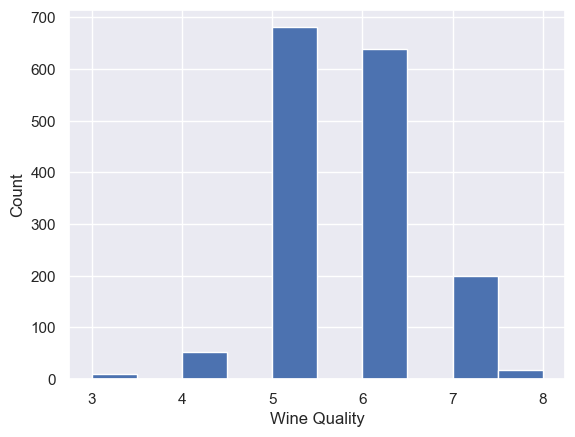

In [9]:
sns.set_theme()
df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

### Spliting Dataset

In [10]:
def split_train_test(data, test_ratio):
    #setting random seed
    np.random.seed(42)

    #shuffing the data 
    shuffled_indices=np.random.permutation(len(data))

    #calculating the size of test set
    test_set_size=int(len(data)*test_ratio)

    #splitting the dataset into train and test set
    test_indices = shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return df.iloc[train_indices],df.iloc[test_indices]


In [11]:
train_set,test_set=split_train_test(df,0.2)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_test_split(df,test_size=0.2,random_state=42)

[      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 493             8.7             0.690         0.31             3.0      0.086   
 354             6.1             0.210         0.40             1.4      0.066   
 342            10.9             0.390         0.47             1.8      0.118   
 834             8.8             0.685         0.26             1.6      0.088   
 705             8.4             1.035         0.15             6.0      0.073   
 ...             ...               ...          ...             ...        ...   
 1130            9.1             0.600         0.00             1.9      0.058   
 1294            8.2             0.635         0.10             2.1      0.073   
 860             7.2             0.620         0.06             2.7      0.077   
 1459            7.9             0.200         0.35             1.7      0.054   
 1126            5.8             0.290         0.26             1.7      0.063   
 
       free su

Text(0, 0.5, 'Count')

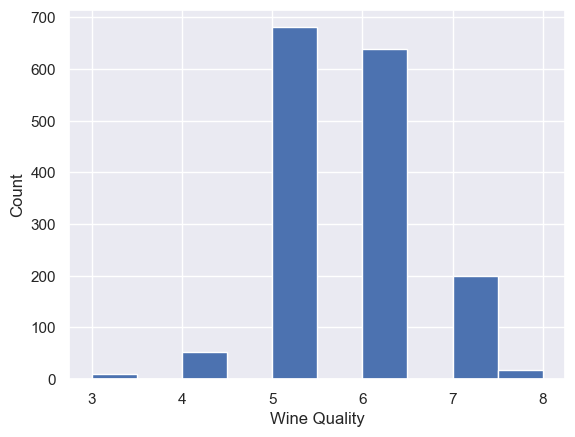

In [14]:
sns.set()
df.quality.hist()
plt.xlabel("Wine Quality")
plt.ylabel("Count")

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_ind,test_ind in sss.split(df,df['quality']):
    strat_train_set=df.loc[train_ind]
    strat_test_set=df.loc[test_ind]

print("Train Set: ",strat_train_set)

Train Set:        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1542            6.7             0.855         0.02            1.90      0.064   
1558            6.9             0.630         0.33            6.70      0.235   
344            11.9             0.570         0.50            2.60      0.082   
924             8.6             0.470         0.27            2.30      0.055   
971            10.4             0.260         0.48            1.90      0.066   
...             ...               ...          ...             ...        ...   
1056            8.9             0.480         0.53            4.00      0.101   
1394            6.4             0.570         0.14            3.90      0.070   
337             7.8             0.430         0.32            2.80      0.080   
539            11.2             0.500         0.74            5.15      0.100   
1083            8.7             0.420         0.45            2.40      0.072   

      free sulf

In [30]:
print("Test set",strat_train_set)

Test set       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1542            6.7             0.855         0.02            1.90      0.064   
1558            6.9             0.630         0.33            6.70      0.235   
344            11.9             0.570         0.50            2.60      0.082   
924             8.6             0.470         0.27            2.30      0.055   
971            10.4             0.260         0.48            1.90      0.066   
...             ...               ...          ...             ...        ...   
1056            8.9             0.480         0.53            4.00      0.101   
1394            6.4             0.570         0.14            3.90      0.070   
337             7.8             0.430         0.32            2.80      0.080   
539            11.2             0.500         0.74            5.15      0.100   
1083            8.7             0.420         0.45            2.40      0.072   

      free sulfur 

In [20]:
strat_dist=strat_test_set['quality'].value_counts()/len(strat_test_set)

In [32]:
train_index, test_index= next(sss.split(df, df["quality"]))
strat_train_set = df.loc[train_index]
strat_test_set = df.loc[test_index]

In [33]:
print("Training ",strat_train_set)

Training        fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1542            6.7             0.855         0.02            1.90      0.064   
1558            6.9             0.630         0.33            6.70      0.235   
344            11.9             0.570         0.50            2.60      0.082   
924             8.6             0.470         0.27            2.30      0.055   
971            10.4             0.260         0.48            1.90      0.066   
...             ...               ...          ...             ...        ...   
1056            8.9             0.480         0.53            4.00      0.101   
1394            6.4             0.570         0.14            3.90      0.070   
337             7.8             0.430         0.32            2.80      0.080   
539            11.2             0.500         0.74            5.15      0.100   
1083            8.7             0.420         0.45            2.40      0.072   

      free sulfur

In [34]:
print("Testing set",strat_test_set)

Testing set       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
963             8.8              0.27         0.39             2.0      0.100   
475             9.6              0.68         0.24             2.2      0.087   
1               7.8              0.88         0.00             2.6      0.098   
329            10.7              0.46         0.39             2.0      0.061   
149             8.2              0.40         0.44             2.8      0.089   
...             ...               ...          ...             ...        ...   
1173            7.6              0.36         0.31             1.7      0.079   
827             7.1              0.46         0.14             2.8      0.076   
356            11.5              0.41         0.52             3.0      0.080   
1287            8.0              0.60         0.08             2.6      0.056   
789             8.6              0.63         0.17             2.9      0.099   

      free sulf

In [35]:
overall_dist=df['quality'].value_counts()/len(df)

In [36]:
dist_comparison=pd.DataFrame({
    'overall':overall_dist,
    'startified':strat_dist
})
dist_comparison['diff(s-o)']=dist_comparison['startified']-dist_comparison['overall']
dist_comparison['diff(s-o)_percen']=100*(dist_comparison['diff(s-o)']/dist_comparison['overall'])

In [37]:
dist_comparison

,overall,startified,diff(s-o),diff(s-o)_percen
5,0.425891,0.425000,-0.000891,-0.209251
6,0.398999,0.400000,0.001001,0.250784
7,0.124453,0.125000,0.000547,0.439698
4,0.033146,0.034375,0.001229,3.708726
8,0.011257,0.009375,-0.001882,-16.718750
3,0.006254,0.006250,-0.000004,-0.062500
